In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("world_population_worldbank.csv")
print(df.head())

                  Country Name Country Code         1960         1961  \
0                        Aruba          ABW      54608.0      55811.0   
1  Africa Eastern and Southern          AFE  130692579.0  134169237.0   
2                  Afghanistan          AFG    8622466.0    8790140.0   
3   Africa Western and Central          AFW   97256290.0   99314028.0   
4                       Angola          AGO    5357195.0    5441333.0   

          1962         1963         1964         1965         1966  \
0      56682.0      57475.0      58178.0      58782.0      59291.0   
1  137835590.0  141630546.0  145605995.0  149742351.0  153955516.0   
2    8969047.0    9157465.0    9355514.0    9565147.0    9783147.0   
3  101445032.0  103667517.0  105959979.0  108336203.0  110798486.0   
4    5521400.0    5599827.0    5673199.0    5736582.0    5787044.0   

          1967  ...         2014         2015         2016         2017  \
0      59522.0  ...     103594.0     104257.0     104874.0     10

      Population
1960     667.070
1965     715.185
1970     818.315
1975     916.395
1978     956.165
1990    1135.185
2000    1262.645
2010    1337.705
2020    1411.100


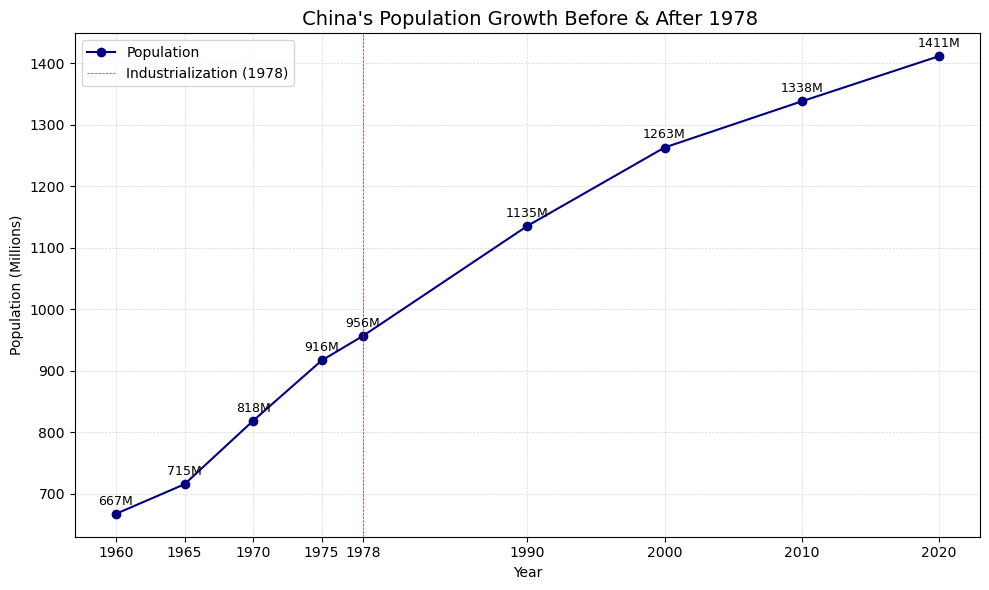

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter China
china_df = df[df['Country Name'] == 'China']

# Include more years for better trend visibility
years = ['1960','1965', '1970', '1975','1978', '1990', '2000','2010','2020']
china_selected = china_df[years].T
china_selected.columns = ['Population']

# Convert index to int and scale to millions
china_selected.index = china_selected.index.astype(int)
china_selected['Population'] = china_selected['Population'] / 1000000
print(china_selected)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(china_selected.index, china_selected['Population'], marker='o', linestyle='-', color='navy', label='Population')

# Annotate each point
for year, pop in zip(china_selected.index, china_selected['Population']):
    plt.text(year, pop + 15, f"{pop:.0f}M", ha='center', fontsize=9)

# Add vertical line for 1978
plt.axvline(x=1978, color='crimson', linestyle='--', linewidth=0.5, label='Industrialization (1978)')

# Labels & styling
plt.title(" China's Population Growth Before & After 1978", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.legend()
plt.grid(True, alpha=0.5, linestyle="--",linewidth=0.5)
plt.xticks(china_selected.index)
plt.tight_layout()
plt.show()


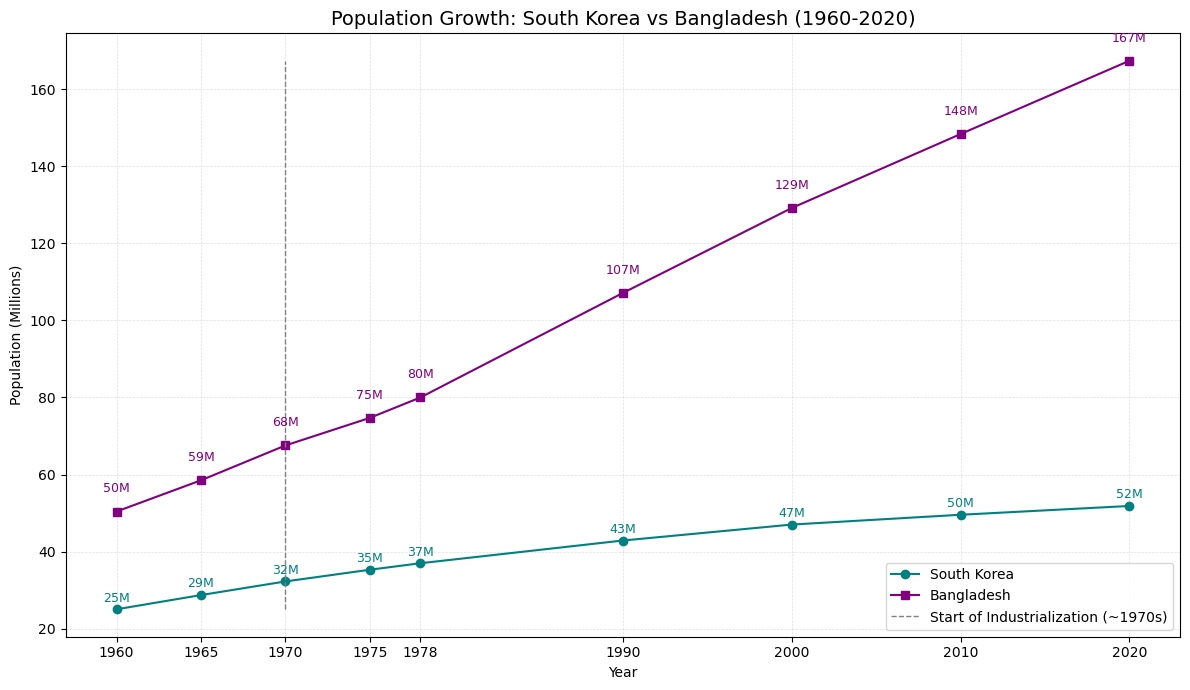

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter South Korea and Bangladesh
skorea_df = df[df['Country Name'] == 'Korea, Rep.']
bangladesh_df = df[df['Country Name'] == 'Bangladesh']

# Years to compare
years = ['1960', '1965', '1970', '1975', '1978', '1990', '2000', '2010', '2020']

# Get South Korea data
skorea_selected = skorea_df[years].T
skorea_selected.columns = ['South Korea']
skorea_selected.index = skorea_selected.index.astype(int)
skorea_selected['South Korea'] = skorea_selected['South Korea'] / 1_000_000  # to millions

# Get Bangladesh data
bangladesh_selected = bangladesh_df[years].T
bangladesh_selected.columns = ['Bangladesh']
bangladesh_selected.index = bangladesh_selected.index.astype(int)
bangladesh_selected['Bangladesh'] = bangladesh_selected['Bangladesh'] / 1_000_000  # to millions

# Merge both into one DataFrame
combined = pd.concat([skorea_selected, bangladesh_selected], axis=1)

# Plot
plt.figure(figsize=(12, 7))
plt.plot(combined.index, combined['South Korea'], marker='o', label='South Korea', color='teal')
plt.plot(combined.index, combined['Bangladesh'], marker='s', label='Bangladesh', color='purple')

# Annotate each point
for year in combined.index:
    plt.text(year, combined['South Korea'][year] + 2, f"{combined['South Korea'][year]:.0f}M", ha='center', fontsize=9, color='teal')
    plt.text(year, combined['Bangladesh'][year] + 5, f"{combined['Bangladesh'][year]:.0f}M", ha='center', fontsize=9, color='purple')

# Optional: Add industrialization marker (say ~1970 for both)
plt.plot([1970, 1970], [combined.min().min(), combined.max().max()], color='gray', linestyle='--', linewidth=1, label='Start of Industrialization (~1970s)')

# Labels and Styling
plt.title("Population Growth: South Korea vs Bangladesh (1960-2020)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population (Millions)")
plt.grid(True, alpha=0.4, linestyle="--", linewidth=0.5)
plt.legend()
plt.xticks(combined.index)
plt.tight_layout()
plt.show()
